<a href="https://colab.research.google.com/github/NguyenVanDucAnh-20104015/AI-Bai-Tap/blob/main/monan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/mon an/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 429 images belonging to 10 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/mon an/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 56 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
validation.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
14/14 [==============================] - 69s 5s/step - loss: 4.5595 - accuracy: 0.0979 - val_loss: 2.2754 - val_accuracy: 0.2500
Epoch 2/100
14/14 [==============================] - 66s 5s/step - loss: 2.2970 - accuracy: 0.1772 - val_loss: 2.1222 - val_accuracy: 0.2679
Epoch 3/100
14/14 [==============================] - 66s 5s/step - loss: 2.1371 - accuracy: 0.2028 - val_loss: 2.0793 - val_accuracy: 0.1786
Epoch 4/100
14/14 [==============================] - 66s 5s/step - loss: 2.0411 - accuracy: 0.2867 - val_loss: 1.9332 - val_accuracy: 0.2679
Epoch 5/100
14/14 [==============================] - 67s 5s/step - loss: 1.9073 - accuracy: 0.3170 - val_loss: 1.7262 - val_accuracy: 0.4643
Epoch 6/100
14/14 [==============================] - 66s 5s/step - loss: 1.8294 - accuracy: 0.3939 - val_loss: 1.7919 - val_accuracy: 0.3571
Epoch 7/100
14/14 [==============================] - 66s 5s/step - loss: 1.7490 - accuracy: 0.3963 - val_loss: 1.5185 - val_accuracy: 0.4643
Epoch 8/100
1

In [ ]:
model.save("Food.h5")

In [ ]:
model_CNN=load_model('Food.h5')

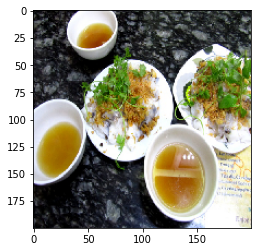

In [ ]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/mon an/Test/Banh cuon/1.jpg',target_size = (200,200))
plt.imshow(img)


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/monan.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/monan.ipynb to html
[NbConvertApp] Writing 457505 bytes to /content/drive/MyDrive/monan.html
